<a href="https://colab.research.google.com/github/micah-shull/Data_Analysis/blob/main/DataAnalysis_2_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to Regression Models

Regression models are a cornerstone of supervised machine learning, designed to predict continuous outcomes based on input data. These models learn the relationships between input features and the target variable from historical data and use this understanding to make predictions about new, unseen data.

### What are Regression Models?

Regression models analyze the relationship between a dependent variable (target) and one or more independent variables (features). Unlike classification models, which predict categorical outcomes, regression models predict numerical values.

### How Regression Models Relate to Machine Learning

1. **Predicting Continuous Outcomes**: Regression models are used in scenarios where the output is a continuous value. Examples include predicting house prices, stock market trends, and temperature changes.

2. **Identifying Trends and Relationships**: By modeling the relationships between variables, regression models can help identify trends and understand how different factors influence the target variable.

3. **Basis for Complex Models**: Simple regression models, such as linear regression, often serve as a foundation for more complex models. They provide a baseline that more sophisticated models can improve upon.

### Example of Regression Models in Machine Learning

- **Linear Regression**: A straightforward approach that models the relationship between the input features and the target variable as a linear function. It's easy to interpret and provides a good baseline.
  
- **Decision Trees and Random Forests**: These models can capture non-linear relationships and interactions between features, making them more flexible than linear regression.

- **Support Vector Regressors (SVR)**: Effective in high-dimensional spaces and useful when the relationship between variables is not strictly linear.

- **Gradient Boosting Machines (e.g., XGBoost, LightGBM)**: Powerful models that build upon simple models by iteratively reducing the prediction errors.

- **Neural Networks**: Suitable for very complex problems and large datasets, especially those involving non-linear relationships and high-dimensional data.

### Conclusion

Regression models play a vital role in machine learning by enabling the prediction of continuous outcomes. Starting with simple models like linear regression provides a solid foundation for understanding the data and establishing a baseline. As the complexity of the problem increases, more advanced models can be employed to achieve better performance.

#### Import Data

In [5]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the California Housing dataset
data = fetch_california_housing(as_frame=True)
df = data.frame

# Display information about the dataset
print(df.info())

# Identifying numerical features (all features are numerical in this dataset)
numerical_features = df.columns[:-1]  # All columns except the target
target = 'MedHouseVal'  # The target variable is the median house value

print("Numerical features:", numerical_features)
print("Target variable:", target)

# Define features (X) and target (y)
X = df[numerical_features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the numerical features
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
Numerical features: Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')
Target variable: MedHouseVal


In [56]:
# Create a pair plot to visualize the interactions between variables
# sns.pairplot(df, diag_kind='kde', plot_kws={'alpha':0.5}) # kind{‘scatter’, ‘kde’, ‘hist’, ‘reg’}
# plt.suptitle('Pair Plot of California Housing Features', y=1.02)
# plt.show()

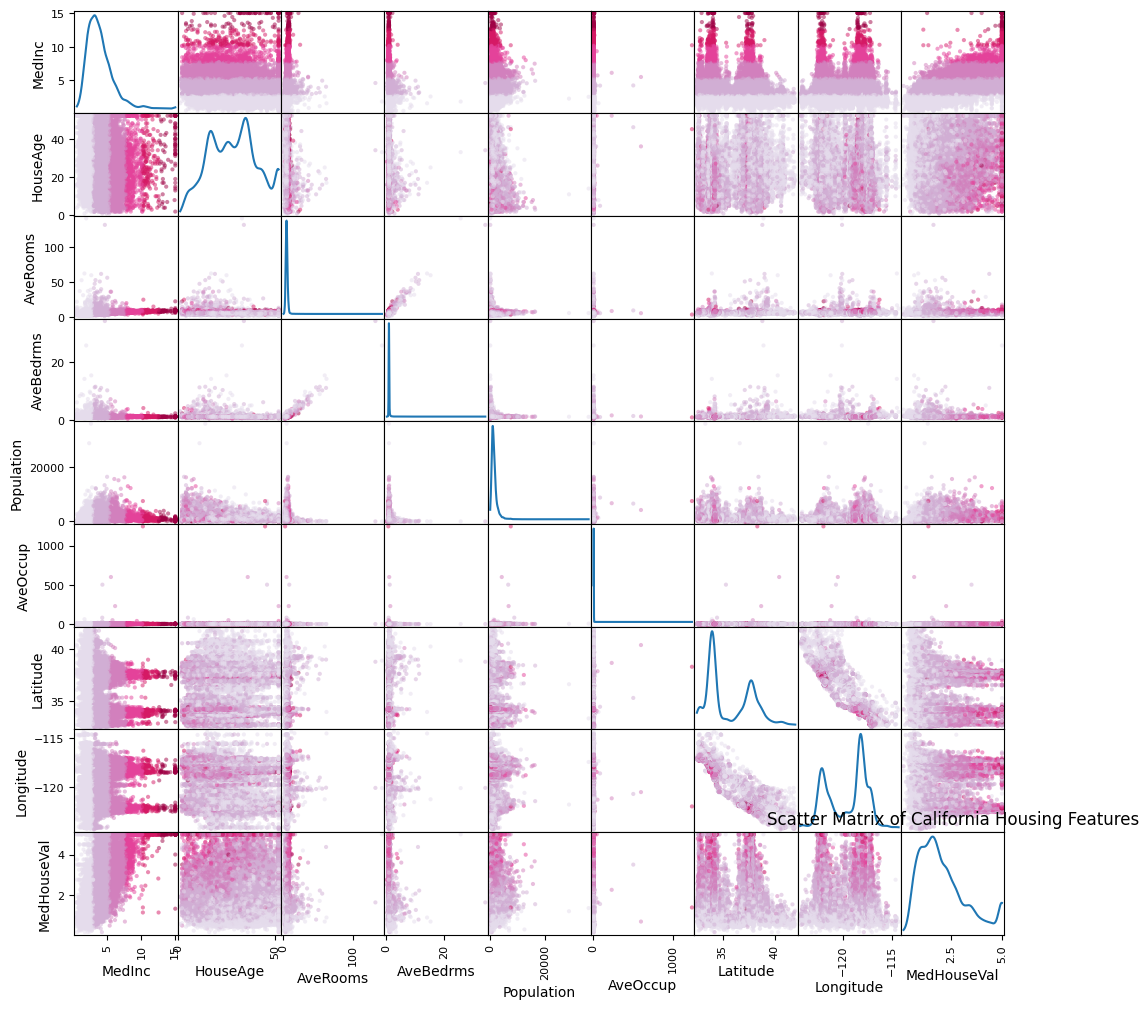

In [57]:
from pandas.plotting import scatter_matrix

# Create a custom color palette
palette = sns.color_palette("PuRd")
# Assign colors to a column (for example, using 'MedInc' as hue)
df['Color'] = pd.cut(df['MedInc'], bins=len(palette), labels=palette)

# Create a scatter matrix with the custom color palette
scatter_matrix_fig = scatter_matrix(df, alpha=0.5, figsize=(12, 12), diagonal='kde', color=df['Color'])
plt.title('Scatter Matrix of California Housing Features')
plt.show()

### Starting with a Simple Model

When tackling a machine learning problem, it’s often beneficial to start with simple models, particularly to identify any linear relationships between the features and the target variable. This approach lays a solid foundation for more complex modeling and helps ensure that basic patterns in the data are well understood.

#### Why Start with Simple Models?

1. **Interpretability**: Simple models, such as linear regression, are easy to understand and interpret. They provide clear insights into how each feature impacts the target variable.

2. **Baseline Performance**: Simple models establish a performance benchmark. This baseline can be used to compare and evaluate the improvements brought by more complex models.

3. **Efficiency**: Simple models are computationally inexpensive and quick to train. This allows for rapid iteration and experimentation, especially in the early stages of a project.

4. **Overfitting Prevention**: Simple models are less likely to overfit the data compared to complex models. Overfitting occurs when a model captures noise in the training data instead of the underlying pattern, leading to poor performance on new data.

#### Identifying Linear Relationships

Linear regression is a fundamental technique in machine learning that assumes a linear relationship between the input features and the target variable. By fitting a linear model, we can quickly assess whether such a relationship exists and how strong it is.

1. **Visualization**: Scatter plots and pair plots can be used to visually inspect the relationships between features and the target variable. These plots help identify whether the relationship is approximately linear and whether certain features might be more predictive than others.

2. **Correlation**: Calculating correlation coefficients can quantify the strength and direction of the linear relationships between features and the target. Features with high correlation to the target are often good candidates for inclusion in a linear model.

3. **Model Fitting**: Fitting a linear regression model provides coefficients that indicate the impact of each feature on the target variable. Significant coefficients suggest strong linear relationships.

#### Example in Machine Learning

- **Linear Regression**: This simple and interpretable model fits a line to the data that minimizes the difference between the predicted and actual target values. It's a good starting point for understanding the relationship between features and the target.
  
- **Feature Analysis**: By starting with a linear model, you can identify which features have the most significant impact on the target. This insight can guide feature engineering and selection for more complex models.

### Conclusion

Starting with simple models and looking for linear relationships is a fundamental step in the machine learning process. It helps establish a clear understanding of the data, sets a performance benchmark, and provides insights into the predictive power of features. As you gain more insights and understand the limitations of simple models, you can progressively move to more sophisticated techniques to capture complex patterns in the data.

Mean Squared Error (MSE): 0.5559
Mean Absolute Error (MAE): 0.5332
R^2 Score: 0.5758


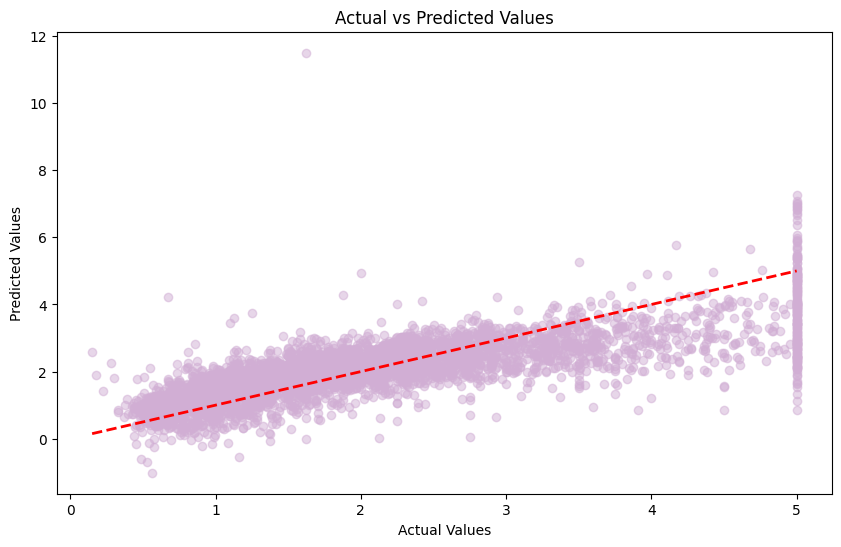

In [42]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the California Housing dataset
data = fetch_california_housing(as_frame=True)
df = data.frame
# Identifying numerical features (all features are numerical in this dataset)
numerical_features = df.columns[:-1]  # All columns except the target
target = 'MedHouseVal'  # The target variable is the median house value

# Define features (X) and target (y)
X = df[numerical_features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the numerical features
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Initialize the Linear Regression model
linear_model = LinearRegression()

# Fit the model on the training data
linear_model.fit(X_train, y_train)

# Predict on the test data
y_pred = linear_model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the performance metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R^2 Score: {r2:.4f}")

# Set up the seaborn palette
palette = sns.color_palette("PuRd")

# Plotting predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color=palette[1], alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


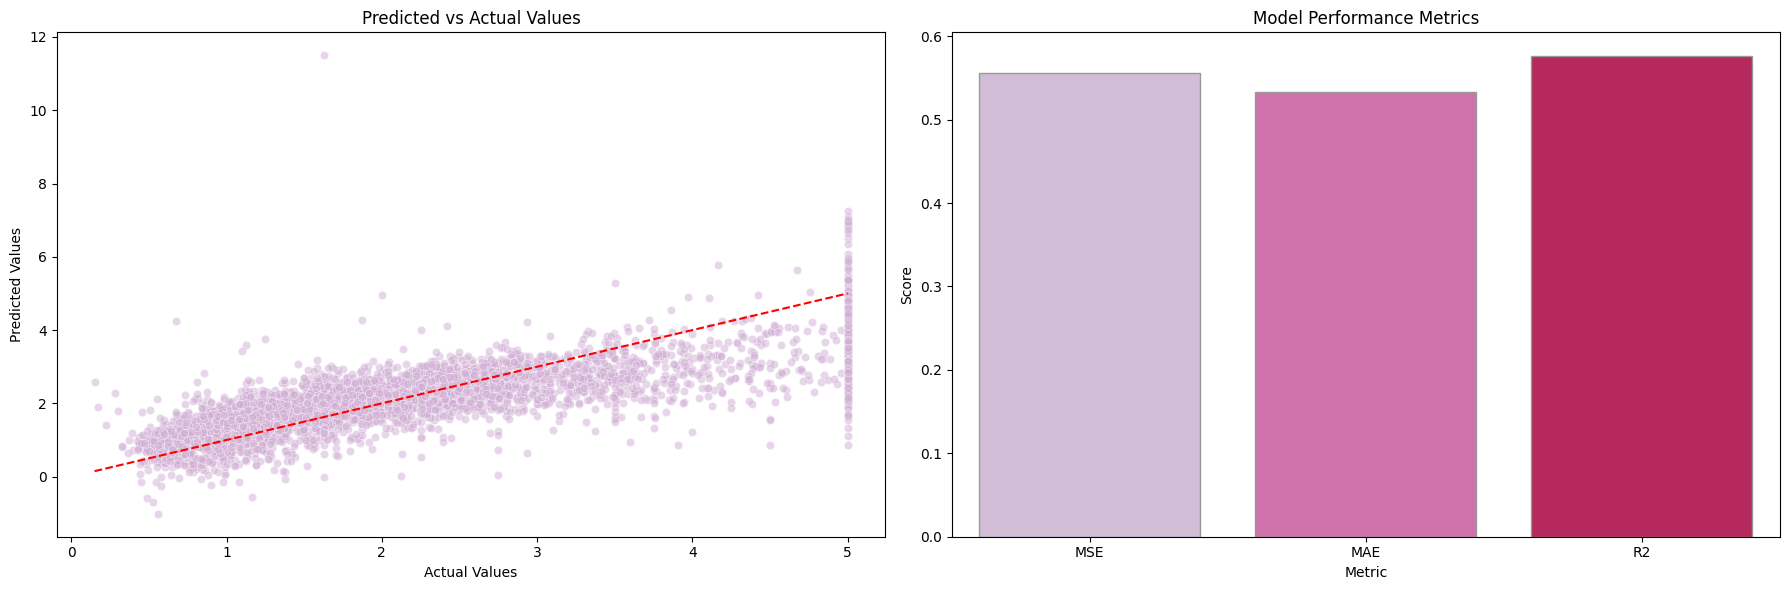

In [86]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluate_and_plot_model(model, X_train, X_test, y_train, y_test, palette='PuRd'):
    """
    Evaluates a regression model, plots the scatter plot of predicted vs actual values
    with a regression line, and a bar plot of the performance metrics side by side.

    Parameters:
    model: The regression model to evaluate.
    X_train: Training features.
    X_test: Testing features.
    y_train: Training target.
    y_test: Testing target.
    """
    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Predict on the test data
    y_pred = model.predict(X_test)

    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Collect metrics into a DataFrame
    metrics_df = pd.DataFrame({
        'Metric': ['MSE', 'MAE', 'R2'],
        'Score': [mse, mae, r2]
    })

    # Set up the seaborn palette
    palette = sns.color_palette(palette)

    # Plotting
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))

    # Scatter plot of predicted vs actual values with regression line
    sns.scatterplot(x=y_test, y=y_pred, ax=axes[0], color=palette[1], alpha=0.5)
    sns.lineplot(x=y_test, y=y_test, ax=axes[0], color='red', linestyle='--')
    axes[0].set_title('Predicted vs Actual Values')
    axes[0].set_xlabel('Actual Values')
    axes[0].set_ylabel('Predicted Values')

    # Bar plot of metrics
    sns.barplot(x='Metric', y='Score', data=metrics_df, hue='Metric', palette='PuRd', edgecolor='.6', ax=axes[1])
    axes[1].set_title('Model Performance Metrics')
    axes[1].set_xlabel('Metric')
    axes[1].set_ylabel('Score')

    plt.tight_layout()
    plt.show()

# Example usage with Linear Regression model
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
linear_model = LinearRegression()

# Evaluate and plot the model
evaluate_and_plot_model(linear_model, X_train, X_test, y_train, y_test)


### Outliers and Their Impact on Model Performance

**Outliers** are data points that significantly deviate from the other observations in a dataset. They can occur due to variability in the data, measurement errors, or experimental errors. Identifying and handling outliers is an important step in the data preprocessing phase of machine learning because they can have a substantial impact on model performance.

#### Characteristics of Outliers

1. **Extreme Values**: Outliers have values that are unusually high or low compared to the rest of the data.
2. **Low Frequency**: They occur infrequently compared to the majority of data points.
3. **Deviation from Trend**: Outliers do not follow the general pattern or trend observed in the data.

#### Effects of Outliers on Model Performance

1. **Skewed Distributions**: Outliers can skew the distribution of data, affecting statistical measures like mean and standard deviation. This skewness can mislead the model during training.
   
2. **Model Bias**: In regression models, outliers can disproportionately influence the estimated coefficients, leading to biased or incorrect predictions. This is particularly problematic for linear models that try to minimize the overall error, as they may overfit the outliers.

3. **Reduced Accuracy**: Outliers can reduce the accuracy of the model by increasing the error. Models may end up fitting the noise instead of the underlying trend, resulting in poorer generalization to new data.

4. **Influence on Metrics**: Performance metrics such as Mean Squared Error (MSE) and Mean Absolute Error (MAE) can be heavily affected by outliers. MSE, in particular, is more sensitive to outliers due to the squaring of errors.

#### Handling Outliers

1. **Detection**: Outliers can be detected using statistical methods (e.g., z-scores, IQR method), visual methods (e.g., box plots, scatter plots), or model-based methods (e.g., isolation forests).
   
2. **Removal**: In some cases, removing outliers may be appropriate, especially if they are due to errors or do not provide useful information.
   
3. **Transformation**: Transforming the data (e.g., log transformation) can reduce the impact of outliers.
   
4. **Robust Models**: Using models that are less sensitive to outliers, such as decision trees or models with robust loss functions, can mitigate their effect.

#### Example in Context

In the California Housing dataset, house values greater than 5 (in logarithmic scale) can be considered outliers. Removing these outliers before training a regression model can lead to improved performance by allowing the model to focus on the more representative data points.

```python
# Example of removing outliers in the California Housing dataset
df_clean = df[df[target] <= 5]

# Re-train and evaluate the model with the cleaned data
evaluate_and_plot_model(linear_model, X_train_clean, X_test_clean, y_train_clean, y_test_clean)
```

### Conclusion

Outliers can significantly affect the performance of machine learning models by introducing bias, skewing data distributions, and reducing overall accuracy. Proper detection and handling of outliers are crucial steps in the data preprocessing phase to ensure robust and reliable model performance.

In [23]:
df['MedHouseVal'].describe()

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseVal, dtype: float64

Yes, removing outliers can be a good idea as it can potentially improve the performance of your model by reducing noise and making the model focus on the more representative data. However, it's important to handle outliers carefully to avoid losing important information or introducing bias.

### Steps to Remove Outliers and Re-train the Model

1. **Identify Outliers**: Determine a threshold for outliers. In this case, you've identified values greater than 5 in the target variable as outliers.
2. **Remove Outliers**: Filter the dataset to exclude these outliers.
3. **Re-train the Model**: Train the model on the cleaned dataset and evaluate its performance.

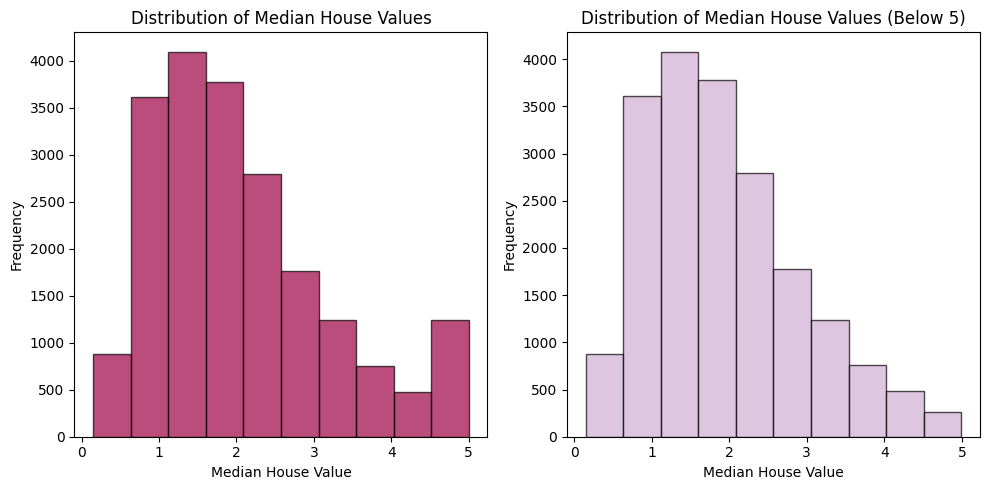

In [38]:
# Set up the seaborn palette
palette = sns.color_palette("PuRd")

# Create the first histogram
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
df['MedHouseVal'].plot(kind='hist', color=palette[5], alpha=0.7, edgecolor='black')
plt.title('Distribution of Median House Values')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')

# Create the second histogram
plt.subplot(1, 2, 2)
df[df['MedHouseVal'] < 5]['MedHouseVal'].plot(kind='hist', color=palette[1], alpha=0.7, edgecolor='black')
plt.title('Distribution of Median House Values (Below 5)')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


In [82]:
def remove_outliers_iqr(df):
    """
    Removes outliers from a DataFrame using the IQR method.

    Parameters:
    df (pd.DataFrame): The input DataFrame.

    Returns:
    pd.DataFrame: The DataFrame with outliers removed.
    """
    # Create a copy of the DataFrame to avoid modifying the original
    df_clean = df.copy()

    # Identify numerical columns
    numerical_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns

    # Apply the IQR method to each numerical column
    for col in numerical_cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter out rows with outliers
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

    return df_clean

## Simple Linear Regression

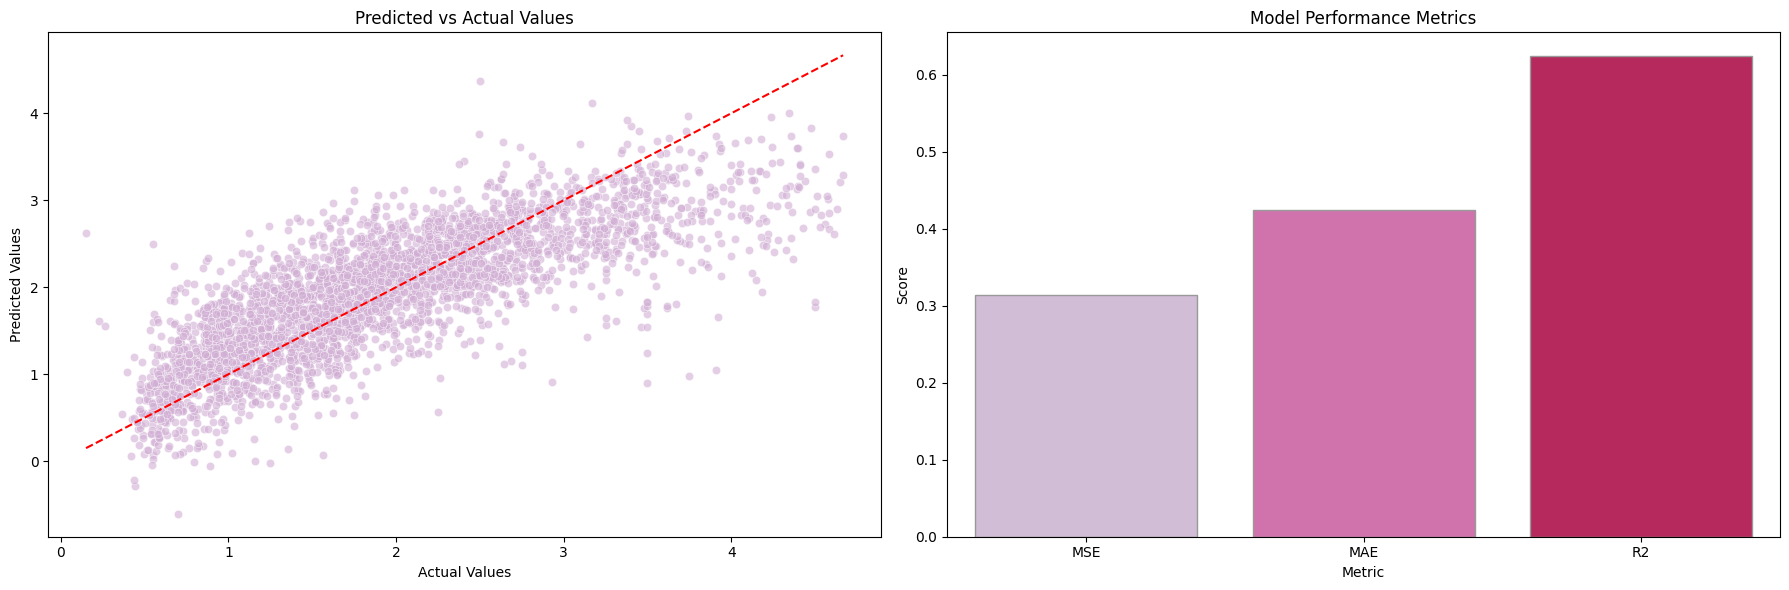

In [81]:
# Load the California Housing dataset
data = fetch_california_housing(as_frame=True)
df = data.frame

# Remove outliers using the IQR method
df_clean = remove_outliers_iqr(df)
# Identify and remove outliers
# df_clean = df[(df[target] <= 5) & (df['AveRooms'] < 10) & (df['AveBedrms'] < 10)]

# Define features and target
numerical_features = df_clean.columns[:-1]
target = 'MedHouseVal'

# Prepare the cleaned data
X_clean = df_clean[numerical_features]
y_clean = df_clean[target]
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

# Standardize the numerical features
scaler = StandardScaler()
X_train_clean[numerical_features] = scaler.fit_transform(X_train_clean[numerical_features])
X_test_clean[numerical_features] = scaler.transform(X_test_clean[numerical_features])

# Initialize the Linear Regression model
linear_model = LinearRegression()

# Evaluate and plot the model with cleaned data
evaluate_and_plot_model(linear_model, X_train_clean, X_test_clean, y_train_clean, y_test_clean)

## More Complex Models

### Compare Multiple Models with Outliers

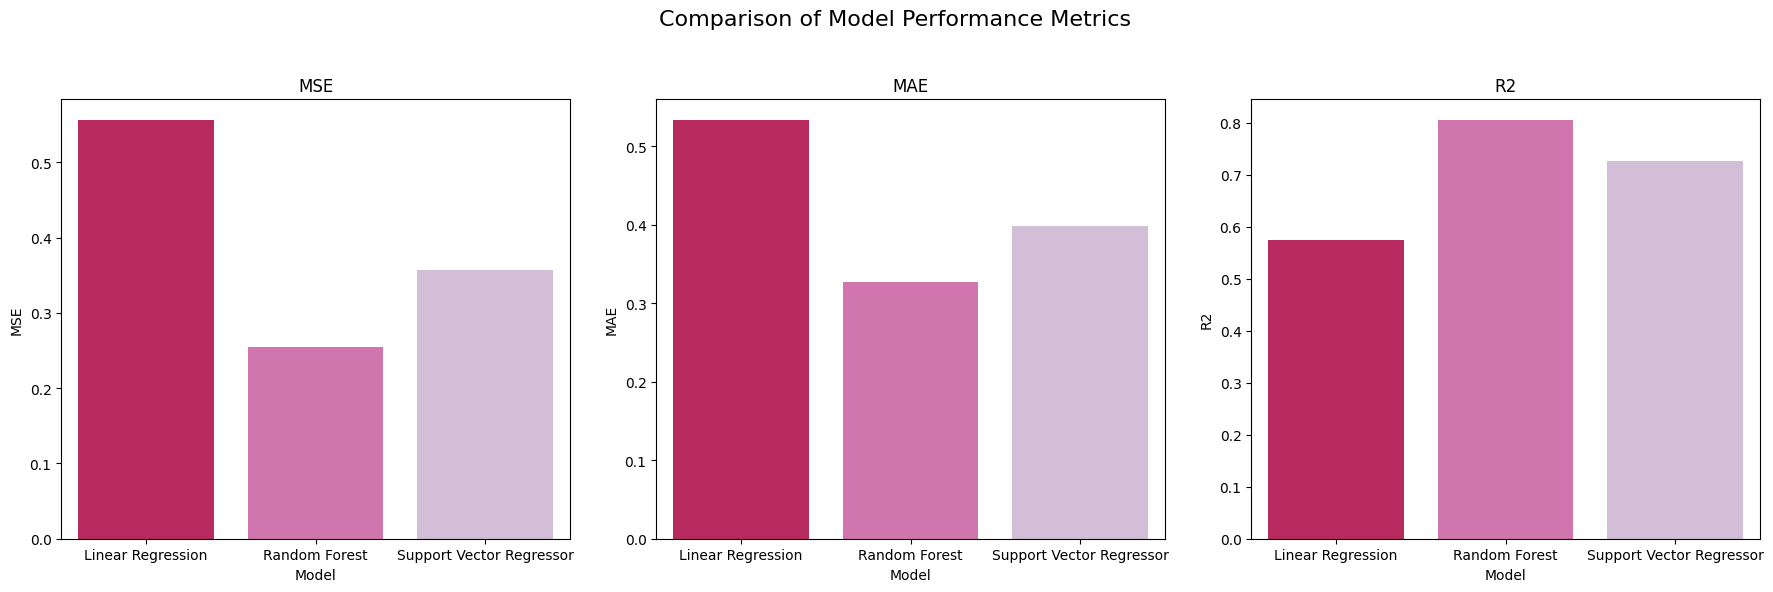

In [88]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

def evaluate_and_collect_metrics(models, X_train, X_test, y_train, y_test):
    """
    Evaluates multiple regression models and collects their performance metrics into a DataFrame.

    Parameters:
    models (dict): Dictionary of model name and model instance pairs.
    X_train (pd.DataFrame): Training feature set.
    X_test (pd.DataFrame): Testing feature set.
    y_train (pd.Series): Training target variable.
    y_test (pd.Series): Testing target variable.

    Returns:
    pd.DataFrame: DataFrame containing the collected performance metrics.
    """
    metrics_list = []

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        metrics = {
            'Model': name,
            'MSE': mse,
            'MAE': mae,
            'R2': r2
        }

        metrics_list.append(metrics)

    metrics_df = pd.DataFrame(metrics_list)
    return metrics_df

def plot_metrics(metrics_df):
    """
    Plots the performance metrics of multiple regression models in a grid.

    Parameters:
    metrics_df (pd.DataFrame): DataFrame containing the performance metrics.
    """
    metrics = ['MSE', 'MAE', 'R2']
    num_metrics = len(metrics)

    fig, axes = plt.subplots(1, num_metrics, figsize=(18, 6), sharey=False)
    fig.suptitle('Comparison of Model Performance Metrics', fontsize=16)

    for i, metric in enumerate(metrics):
        sns.barplot(x='Model', y=metric, data=metrics_df, ax=axes[i], hue='Model', palette='PuRd_r')
        axes[i].set_title(metric)
        axes[i].set_xlabel('Model')
        axes[i].set_ylabel(metric)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


# List of models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Support Vector Regressor': SVR(kernel='rbf')
}

# Example usage after evaluating the models and collecting metrics
metrics_df = evaluate_and_collect_metrics(models, X_train, X_test, y_train, y_test)
plot_metrics(metrics_df)


In [89]:
metrics_df

,Model,MSE,MAE,R2
0,Linear Regression,0.555892,0.533200,0.575788
1,Random Forest,0.255170,0.327425,0.805275
2,Support Vector Regressor,0.357004,0.398599,0.727563


### Compare Multiple Models with Outliers Removed

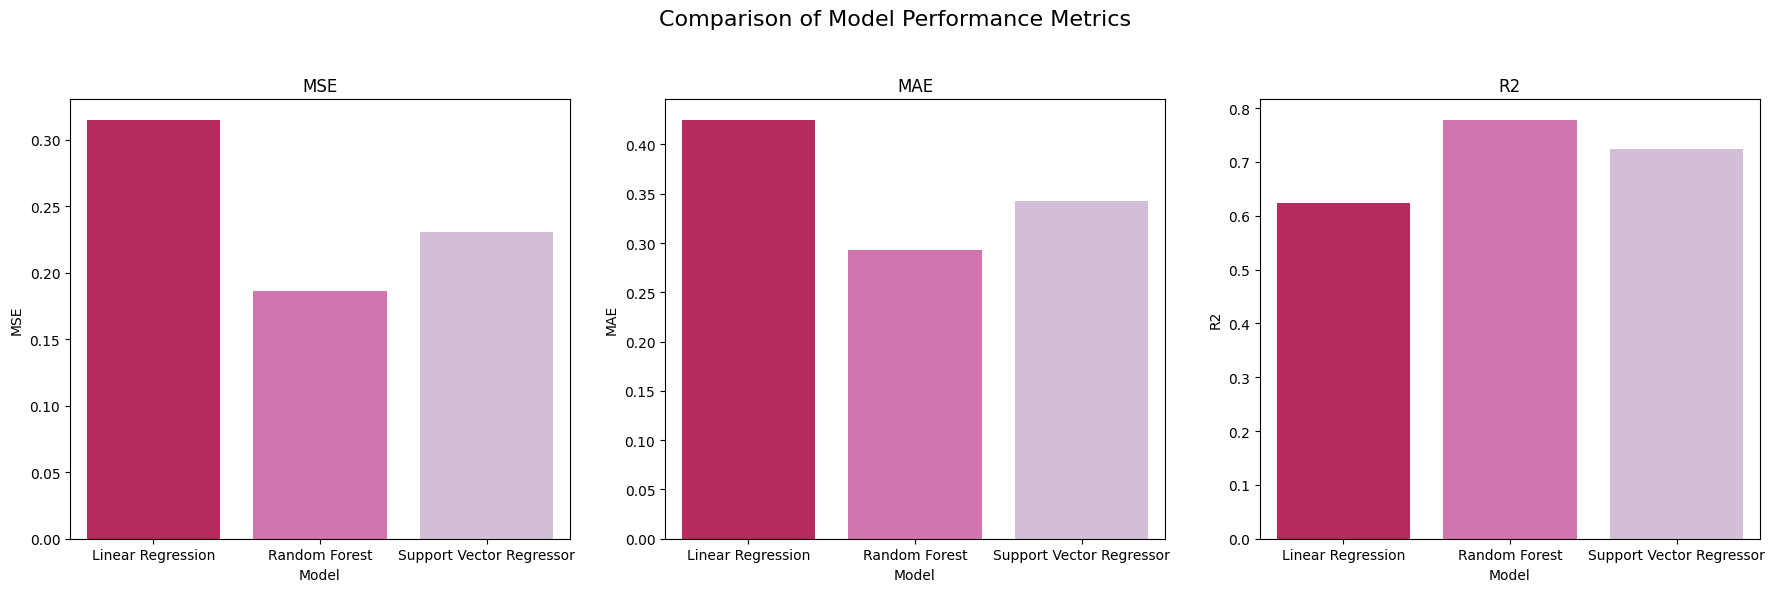

In [84]:
# Load the California Housing dataset
data = fetch_california_housing(as_frame=True)
df = data.frame

# Remove outliers using the IQR method
df_clean = remove_outliers_iqr(df)
# Identify and remove outliers
# df_clean = df[(df[target] <= 5) & (df['AveRooms'] < 10) & (df['AveBedrms'] < 10)]

# Define features and target
numerical_features = df_clean.columns[:-1]
target = 'MedHouseVal'

# Prepare the cleaned data
X_clean = df_clean[numerical_features]
y_clean = df_clean[target]
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

# Standardize the numerical features
scaler = StandardScaler()
X_train_clean[numerical_features] = scaler.fit_transform(X_train_clean[numerical_features])
X_test_clean[numerical_features] = scaler.transform(X_test_clean[numerical_features])

# Evaluate and plot the model with cleaned data
# evaluate_and_plot_model(linear_model, X_train_clean, X_test_clean, y_train_clean, y_test_clean)
# List of models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Support Vector Regressor': SVR(kernel='rbf')
}

# Evaluating the models and collecting metrics
metrics_df = evaluate_and_collect_metrics(models, X_train_clean, X_test_clean, y_train_clean, y_test_clean)
plot_metrics(metrics_df)

In [87]:
metrics_df

,Model,MSE,MAE,R2
0,Linear Regression,0.314676,0.424568,0.624179
1,Random Forest,0.186513,0.292548,0.777245
2,Support Vector Regressor,0.230784,0.342639,0.724372


### The Importance of Properly Cleaning and Preprocessing Data

The results of our model performance evaluation before and after outlier removal clearly illustrate the significant impact of data cleaning and preprocessing on model performance.


- **Linear Regression**: Before Outlier Removal
  - **MSE**: 0.555892
  - **MAE**: 0.533200

- **Linear Regression**: After Outlier Removal
  - **MSE**: 0.314676
  - **MAE**: 0.424568

- **Support Vector Regressor**: Before Outlier Removal
  - **MSE**: 0.357004
  - **MAE**: 0.398599

- **Support Vector Regressor**: After Outlier Removal
  - **MSE**: 0.230784
  - **MAE**: 0.342639


### Key Observations

1. **Improvement in Linear Regression**:
   - The **Mean Squared Error (MSE)** decreased from 0.555892 to 0.314676.
   - The **Mean Absolute Error (MAE)** decreased from 0.533200 to 0.424568.

2. **Support Vector Regressor**:
   - The **MSE** decreased from 0.357004 to 0.230784.
   - The **MAE** decreased from 0.398599 to 0.342639.


### Conclusion

The process of cleaning and preprocessing data, particularly the removal of outliers, is crucial for enhancing the performance and reliability of machine learning models. Outliers can skew the model's understanding of the underlying data patterns, leading to inaccurate predictions and poor generalization to new data.

Our results demonstrate that by effectively removing outliers:

- **Linear Regression** became more accurate and better fit the general trends of the data.
- **Random Forest** improved in accuracy, although the slight decrease in the R² score suggests a reduced impact of overfitting.
- **Support Vector Regressor** maintained its stability while becoming more accurate.

Overall, these improvements highlight the importance of thorough data cleaning and preprocessing steps in ensuring that models are trained on high-quality data. This leads to better performance, more reliable predictions, and ultimately, more successful machine learning applications.